In [1]:
import torch

### The default dtype is float32.

In [2]:
z = torch.zeros(5,3)
print(z)
print(z.dtype)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
torch.float32


### Overriding the default dtype.

In [3]:
i1 = torch. ones(5,3)
print(i1)
print(i1.dtype)

i2 = torch.ones(5,3, dtype=torch.int16)
print(i2) 
print(i2.dtype)

i3 = torch.ones((5,3), dtype=torch.float16)
print(i3) 
print(i3.dtype)



tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
torch.float32
tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]], dtype=torch.int16)
torch.int16
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float16)
torch.float16


### random tensor with seed 

In [4]:
r0 = torch.rand(2,2)
print(r0)

torch.manual_seed(1729) # set the seed only for the next call
r1 = torch.rand(2,2)
print(r1)

r2 = torch.rand(2,2)
print(r2)

torch.manual_seed(1729)
r3 = torch.rand(2,2)
print(r3)

tensor([[0.6807, 0.2355],
        [0.7290, 0.6584]])
tensor([[0.3126, 0.3791],
        [0.3087, 0.0736]])
tensor([[0.4216, 0.0691],
        [0.2332, 0.4047]])
tensor([[0.3126, 0.3791],
        [0.3087, 0.0736]])


### Arithmetic operations

In [5]:
ones = torch.ones(2, 3)
print(ones)

twos = torch.ones(2, 3) * 2 # every element is multiplied by 2
print(twos)

threes = ones + twos       # addition allowed because shapes are similar
print(threes)              # tensors are added element-wise
print(threes.shape)        # this has the same dimensions as input tensors

r1 = torch.rand(2, 3)
r2 = torch.rand(3, 2)
# uncomment this line to get a runtime error
# r3 = r1 + r2

tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[2., 2., 2.],
        [2., 2., 2.]])
tensor([[3., 3., 3.],
        [3., 3., 3.]])
torch.Size([2, 3])


### Use torch operations for higher performance

In [6]:
r = (torch.rand(2, 2) - 0.5) * 2 # values between -1 and 1
print('A random matrix, r (between -1 & 1) :')
print(r)

# Common mathematical operations are supported:
print('\nAbsolute value of r:')
print(torch.abs(r))

# ...as are trigonometric functions:
print('\nInverse sine of r:')
print(torch.asin(r))

# ...and linear algebra operations like determinant and singular value decomposition
print('\nDeterminant of r:')
print(torch.det(r))
print('\nSingular value decomposition of r:')
print(torch.svd(r))

# ...and statistical and aggregate operations:
print('\nAverage and standard deviation of r:')
print(torch.std_mean(r))
print('\nMaximum value of r:')
print(torch.max(r))


A random matrix, r (between -1 & 1) :
tensor([[ 0.9956, -0.2232],
        [ 0.3858, -0.6593]])

Absolute value of r:
tensor([[0.9956, 0.2232],
        [0.3858, 0.6593]])

Inverse sine of r:
tensor([[ 1.4775, -0.2251],
        [ 0.3961, -0.7199]])

Determinant of r:
tensor(-0.5703)

Singular value decomposition of r:
torch.return_types.svd(
U=tensor([[-0.8353, -0.5497],
        [-0.5497,  0.8353]]),
S=tensor([1.1793, 0.4836]),
V=tensor([[-0.8851, -0.4654],
        [ 0.4654, -0.8851]]))

Average and standard deviation of r:
(tensor(0.7217), tensor(0.1247))

Maximum value of r:
tensor(0.9956)


### Models

In [7]:
import torch.nn as nn
import torch.nn.functional as F

class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        # 1 input image channel (black & white), 6 output channels, 5x5 square convolution kernel
        self.conv1 = nn.Conv2d(1, 6, 5) 
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120) # an affine operation: y = Wx + b
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2)) # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv2(x)), 2) # If the size is a square you can only specify a single number
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:] # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features
    

net = LeNet()
print(net)

input = torch.randn(1, 1, 32, 32) # 32x32 random input black & white image
print("\nImage batch shape: ", input.shape)

output = net(input) # we don't call forward() directly!

print("\nOutput shape: ", output.shape)

print("\nOutput tensor: ", output)

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)



Image batch shape:  torch.Size([1, 1, 32, 32])

Output shape:  torch.Size([1, 10])

Output tensor:  tensor([[ 0.1081,  0.0614,  0.1628,  0.0415,  0.0010, -0.0886,  0.0099,  0.0215,
         -0.0038,  0.0803]], grad_fn=<AddmmBackward0>)


### Datasets & Dataloaders

In [8]:
%matplotlib inline

import torchvision 
import torchvision.transforms as transforms

transform = transforms.Compose(
[
  transforms.ToTensor(), #  converts images loaded by Pillow into PyTorch tensors
  #transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616)) # adjusts the values of the tensor so that their average is zero and their standard deviation is 1.0
  transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) # adjusts the values of the tensor so that their average is zero and their standard deviation is 1.0
 ]
)

#loading data
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

Files already downloaded and verified


In [9]:
# once the dataset is ready, you can give it to the DataLoader
# In the example above, we’ve asked a DataLoader to give us batches of 4 images from trainset, randomizing their order (shuffle=True), and we told it to spin up two workers to load data from disk.
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,shuffle=True, num_workers=2)

In [10]:
# loading test data
testset = torchvision.datasets.CIFAR10(root='./data', train=False,download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,shuffle=False, num_workers=2)

Files already downloaded and verified


horse   dog   car   dog


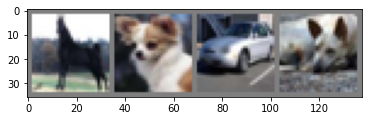

In [15]:
#visulalize the data
import matplotlib.pyplot as plt
import numpy as np

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

# Training  pytorch model

In [16]:
import torch.optim as optim

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [18]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        # Zeroing the gradients (line 9) is an important step. Gradients are accumulated over a batch; if we do not reset them for every batch, they will keep accumulating, which will provide incorrect gradient values, making learning impossible.
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs) # forward pass- prediction
        loss = criterion(outputs, labels) # compute the loss
        loss.backward() # backward pass- compute the gradient
        optimizer.step() # optimize the network

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[epoch: %d, sample: %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')


[epoch: 1, sample:  2000] loss: 1.247
[epoch: 1, sample:  4000] loss: 1.185
[epoch: 1, sample:  6000] loss: 1.184
[epoch: 1, sample:  8000] loss: 1.187
[epoch: 1, sample: 10000] loss: 1.182
[epoch: 1, sample: 12000] loss: 1.171
[epoch: 2, sample:  2000] loss: 1.108
[epoch: 2, sample:  4000] loss: 1.123
[epoch: 2, sample:  6000] loss: 1.105
[epoch: 2, sample:  8000] loss: 1.101
[epoch: 2, sample: 10000] loss: 1.096
[epoch: 2, sample: 12000] loss: 1.079
Finished Training


Test overfitting now with the test set

In [19]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 59 %
